In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import train_test_split

#Lo que viene en el dataset
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 
# No hay valores nulos, por lo que no tenemos que preocuparnos por eso.

data = load_iris()
#print(data)

# Kmeans description

Una breve descripción de ventajas y desventajas de hacer clustering con esté algoritmo, y tener en cuenta para su óptimo funcionamiento.

### Suposición

1) Asumir un tamaño de cluster equilibrado dentro del conjunto de datos.

2) Se supone que la distribución conjunta de las características dentro de cada grupo es esférica: esto significa que las  características dentro de un grupo tienen la misma varianza, y también las características son independientes entre sí.

3) los grupos tienen una densidad similar.

### Contras

1) efecto uniforme: a menudo producen grupos con un tamaño relativamente uniforme, incluso si los datos de entrada tienen un tamaño de grupo diferente.

2) Suposición esférica difícil de satisfacer: la correlación entre las características la rompe, pondría pesos adicionales en las características correlacionadas (debería tomar medidas dependiendo de los problemas); no puede encontrar clústeres o conglomerados no convexos con formas inusuales.

3) densidades diferentes: pueden funcionar mal con agrupaciones con diferentes densidades pero forma esférica.

4) Valor K desconocido: ¿cómo resolver K? 
   - para un rango pequeño de valor K, digamos 2-10, para cada valor K ejecutado muchas veces (20-100 veces), tome el resultado  de agrupamiento con el valor J más bajo entre todos los valores K; 
   - usando el método de codo para decidir el valor de K; 
   - GAPs; 
   - decidir los flujos descendentes K: decidir por los propósitos / objetivos de los proyectos

5) sensible a valores atípicos;

6) sensible a los puntos iniciales y óptimo local, y no hay una solución única para un cierto valor K: así ejecute K media para un valor K muchas veces (20-100 veces), luego elija los resultados con la J más baja

### Pros

1) prácticamente funciona bien incluso algunas suposiciones se rompen;

2) simple, fácil de implementar;

3) fácil de interpretar los resultados de la agrupación;

4) rápido y eficiente en términos de costo computacional, típicamente O (K * n * d);

# Mixture Guassian

En lugar de asignar datos a un clúster, si no estamos seguros de los puntos de datos a los que pertenecen o a qué grupo, utilizamos este método. Utiliza la probabilidad de una muestra para determinar la viabilidad de pertenecer a un clúster.

### Ventajas

1. No supone que los clústeres sean de ninguna geometría. Funciona bien con distribuciones geométricas no lineales también.

2. No sesga los tamaños de conglomerados para que tengan estructuras específicas como lo hace K-Means (Circular).

### Desventajas

1. Utiliza todos los componentes a los que tiene acceso, por lo que la inicialización de clusters será difícil cuando la dimensionalidad de los datos sea alta.

2. Difícil de interpretar.


# GMM description vs K means

GMM es mucho más flexible en términos de agrupamiento en covarianza.
k-means es en realidad un caso especial de GMM en el que la covarianza de cada agrupación a lo largo de todas las dimensiones se acerca a 0. Esto implica que un punto se asignará solo al clúster más cercano. Con GMM, cada grupo puede tener una estructura de covarianza no restringida. Piense en la distribución girada y / o alargada de puntos en un grupo, en lugar de esférica como en kmeans. Como resultado, la asignación de clústeres es mucho más flexible en GMM que en k-means.

#### El modelo de GMM acomoda la membresía mixta

Otra implicación de su estructura de covarianza es que GMM permite la membresía mixta de puntos a clusters. En kmeans, un punto pertenece a un solo cluster, mientras que en GMM un punto pertenece a cada cluster en un grado diferente. El grado se basa en la probabilidad de que el punto se genere a partir de la distribución normal (multivariante) de cada agrupación, con el centro del clúster como la media de la distribución y la covarianza del clúster como su covarianza. Dependiendo de la tarea, la membresía mixta puede ser más apropiada (por ejemplo, los artículos de noticias pueden pertenecer a múltiples grupos de temas) o no (por ejemplo, los organismos pueden pertenecer a una sola especie).

# Spectral clustering 

La agrupación espectral funciona primero transformando los datos del espacio cartesiano en espacio de similitud y luego agrupando en un espacio de similitud.
Los datos originales se proyectan en el nuevo espacio de coordenadas que codifica información sobre cómo son los puntos de datos cercanos. La transformación de similitud reduce la dimensionalidad del espacio y, en términos generales, pre-agrupa los datos en dimensiones ortogonales. Este pre-clustering no es lineal y permite geometrías no convexas conectadas arbitrariamente, que es la principal ventaja de la agrupación espectral.

El mapeo del espacio cartesiano al espacio de similitud es facilitado por la creación y diagonalización de la matriz de similitud. En el caso en que tenga k agrupamientos espacialmente separados y bien definidos, independientemente de la forma geométrica del grupo, la matriz de similitud resultante es diagonal de bloques. Cada bloque corresponderá a un grupo diferente.

Cuando apila los k-vectores propios más bajos de esta matriz como columnas en una nueva matriz y los normaliza, las filas de la matriz son las nuevas coordenadas para cada punto de datos en el nuevo espacio. Ignorando la degeneración, si inspecciona estas nuevas coordenadas verá que los datos se encuentran a lo largo de cada uno de los ejes de su nuevo espacio. Estas son las coordenadas que se utilizan para agrupar y asignar las etiquetas de los grupos de datos originales.

La parte K-means se ejecuta porque los autovectores pueden estar degenerados, y los clústeres no tienen que estar tan claramente separados. Los vectores propios abarcan el espacio lineal definido por los clusters. Pero, los conglomerados pueden sentarse en cualquier coordenadas en el espacio, siempre y cuando se roten 90 grados entre sí en relación con el origen.

# Spectral clustering vs Kmeans

Eche un vistazo a estos seis conjuntos de datos (de juguete), donde se aplica la agrupación espectral para su agrupación en clústeres:

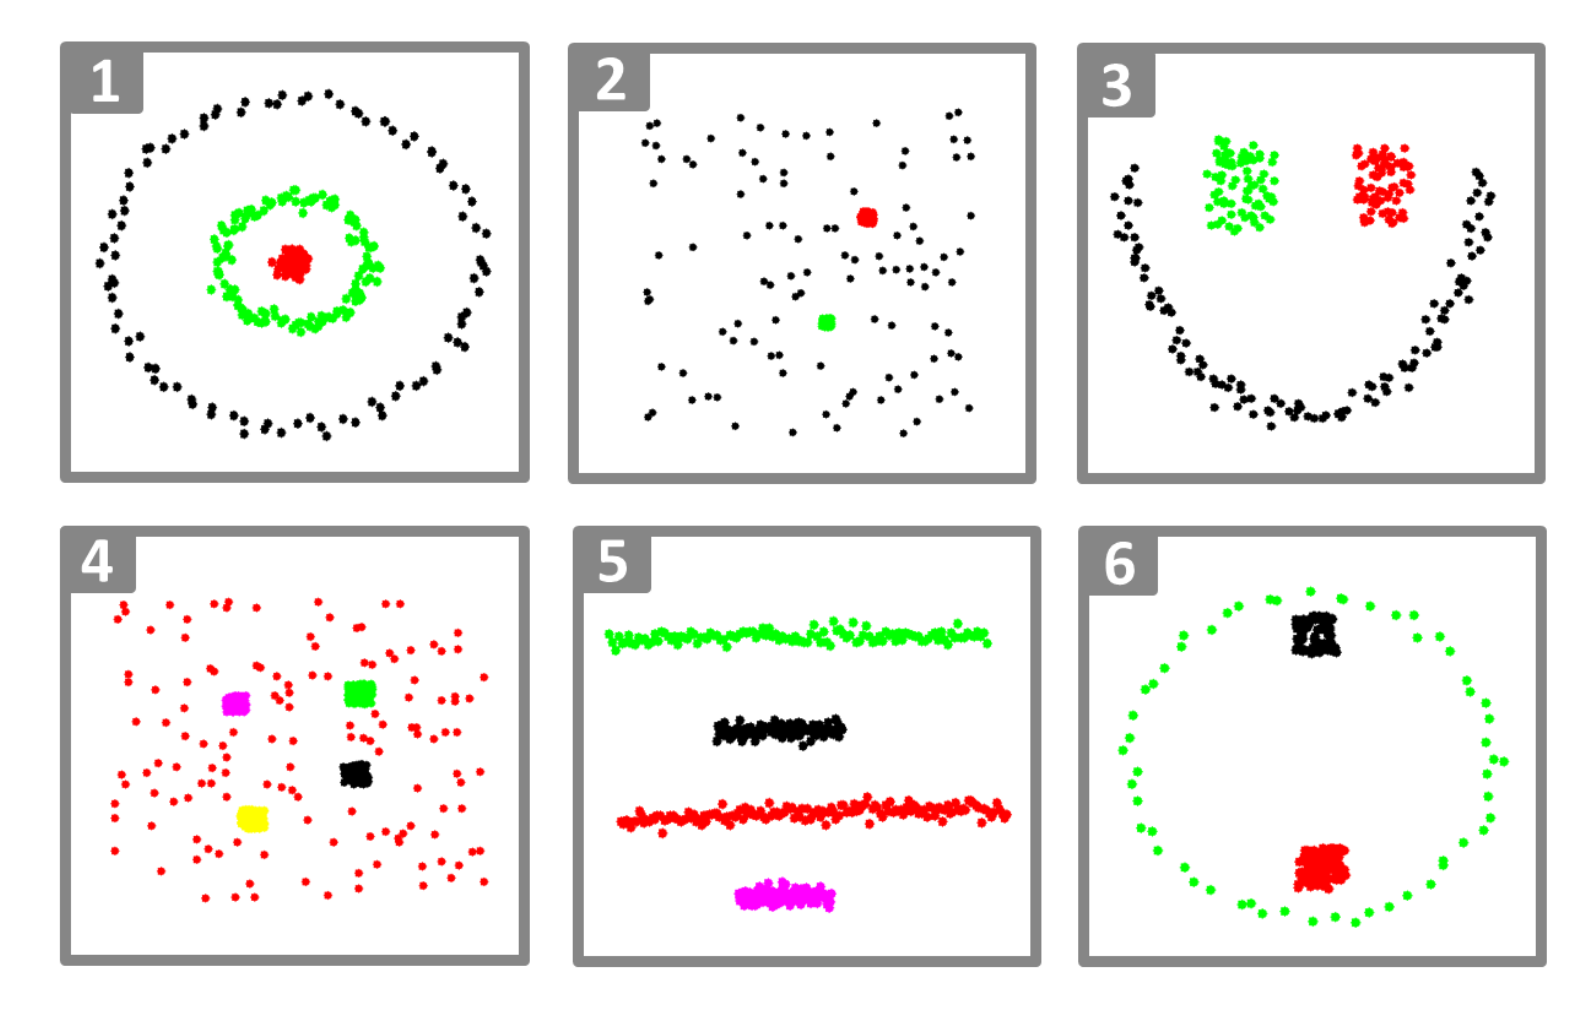

Los K-means no podrán agruparlos eficazmente, incluso cuando el algoritmo conozca la verdadera cantidad de clústeres K.

Esto se debe a que K-means, como algoritmo de agrupamiento de datos, es ideal para descubrir cúmulos globulares como los que se muestran a continuación, donde todos los miembros de cada grupo se encuentran muy cerca el uno del otro (en el sentido euclidiano).


En contraste con el agrupamiento de datos, tenemos técnicas de agrupamiento de gráficos como la agrupación espectral, donde no agrupa los puntos de datos directamente en su espacio de datos nativo sino que forma una matriz de similitud donde la entrada (i, j) es algo distancia de similitud que define entre los puntos de datos i-th y j-th en su conjunto de datos.

Entonces, en cierto sentido, la agrupación espectral es más general (y poderosa) porque siempre que K-means sea apropiado para su uso, también lo es la agrupación espectral (basta con usar una simple distancia euclidiana como medida de similitud). Lo contrario no es cierto.

### Consideraciones 

También hay consideraciones prácticas que debe tener en cuenta al elegir uno de estos métodos sobre el otro. Con K-means se factoriza la matriz de datos de entrada, mientras que con la agrupación espectral se factoriza la matriz de Laplacian (una matriz derivada de la matriz de similitud) ¿Por qué eso importa?

Supongamos que tiene puntos de datos P, cada uno con N dimensiones / características. Luego, usando K-means, tratará con una matriz N por P, mientras que la matriz de entrada a la agrupación espectral tendrá el tamaño P por P. Ahora debería ver las implicaciones prácticas: la agrupación espectral es indiferente a la cantidad de características que usa (El núcleo gaussiano, que puede considerarse como una transformación de características infinitamente dimensional, es particularmente popular cuando se usan agrupaciones espectrales). Sin embargo, se enfrentarán dificultades para aplicar la agrupación espectral (al menos la versión estándar) a conjuntos de datos muy grandes (P grande).

In [2]:
#Clase para funciones Kmeans, GaussianMixture SpectralClustering y sus metodos para entrenar y predecir resultados
class Clustering():
    result_kmeans = 0.0
    result_gnm = 0.0
    result_spectral = 0.0
    
    def __init__(self, cluster):
        self.kmeans = KMeans(n_clusters=cluster)
        self.gnm = GaussianMixture(n_components=cluster)
        self.spectral = SpectralClustering(n_clusters=cluster)
    
    def fit(self, X_train):
        self.kmeans.fit(X_train)
        self.gnm.fit(X_train)
        self.spectral.fit(X_train)

    def predict(self, X_test):
        self.result_kmeans = self.kmeans.predict(X_test)
        print('Kmeans')
        print(self.result_kmeans)
        self.result_gnm = self.gnm.predict(X_test)
        print('Gaussian Mixture')
        print(self.result_gnm)
        self.result_spectral = self.spectral.fit_predict(X_test)
        print('Spectral Clustering')
        print(self.result_spectral)
        return self.result_kmeans, self.result_gnm, self.result_spectral
    
    def printAccuracy(self, t):
        print('Accuracy Kmeans {}%'.format(adjusted_rand_score(t, self.result_kmeans)*100))
        print('Accuracy Gaussian Mixture {}%'.format(adjusted_rand_score(t, self.result_gnm)*100))
        print('Accuracy Spectral Clustering {}%'.format(adjusted_rand_score(t, self.result_spectral)*100))

In [3]:
#funcion para dibujar los resultados 
def ploting(titles, result, X):
    fig, axes = plt.subplots(2, 2)
    for ax, i in zip(axes.flat, range(4)):
        for k in range(len(X)):
            ax.set_title(titles[i])
            if result[i][k] == 0:
                ax.plot(X[k,0], X[k,1], 'or')
            elif result[i][k] == 1: 
                ax.plot(X[k,0], X[k,1], 'ob')
            else:
                ax.plot(X[k,0], X[k,1], 'ok')

    fig.tight_layout()
    plt.show()

['setosa' 'versicolor']
Iris
[1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1]
Kmeans
[1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1]
Gaussian Mixture
[0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0]
Spectral Clustering
[0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0]
Accuracy Kmeans 74.23857868020305%
Accuracy Gaussian Mixture 100.0%
Accuracy Spectral Clustering 62.767475035663345%


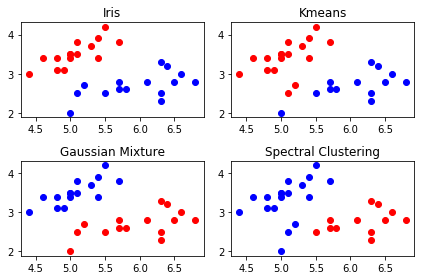

In [4]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

cant = 100
cluster = 2

X = data['data']
X = X[:cant,:2]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']
print(target_names[:cluster])
print('Iris')
print(t_test)

################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)

################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t_test, result_kmeans, result_gnm, result_spectral]
ploting(titles, result, X_test)

## 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
## 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

Podemos ver que al momento de trabajar el clustering sobre está muestra del set de datos #iris las caracteristícas en general del GMM me permite tener un mejor acierto al hacer el agrupamiento de está muestra.

['setosa' 'versicolor']
Iris
[0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0]
Kmeans
[1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1]
Gaussian Mixture
[0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0]
Spectral Clustering
[0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0]
Accuracy Kmeans 100.0%
Accuracy Gaussian Mixture 100.0%
Accuracy Spectral Clustering 100.0%


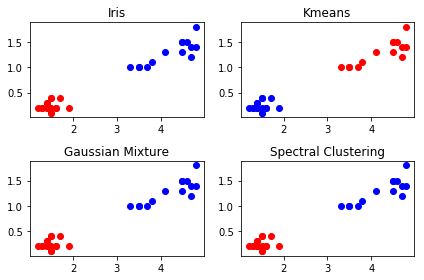

In [5]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 2 Atributos en cm - Largo del Petalo, Ancho del Petalo 

cant = 100
cluster = 2

X = data['data']
X = X[:cant,2:]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']
print(target_names[:cluster])
print('Iris')
print(t_test)


################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t_test, result_kmeans, result_gnm, result_spectral]
ploting(titles, result, X_test)

## 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
## 2 Atributos en cm - Largo del Petalo, Ancho del Petalo 

Podemos ver que al momento de trabajar el clustering sobre está muestra del set de datos #iris los datos tienen una buena representación que me permite tener un agrupamiento éxitoso tanto como para el Kmeans, el GM  el spectral clustering.

In [6]:
# 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

cant = 100
cluster = 2

X = data['data']
X = X[:cant,:]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']
print(target_names[:cluster])
print('Iris')
print(t_test)


################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)

['setosa' 'versicolor']
Iris
[1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0]
Kmeans
[0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1]
Gaussian Mixture
[1 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0]
Spectral Clustering
[0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1]
Accuracy Kmeans 100.0%
Accuracy Gaussian Mixture 100.0%
Accuracy Spectral Clustering 100.0%


### 100 instancias - 2 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor
### 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

Podemos ver que al momento de trabajar el clustering sobre está muestra del set de datos #iris los datos tienen una buena representación que me permite tener un agrupamiento éxitoso tanto como para el Kmeans, el GM  el spectral clustering.

['setosa' 'versicolor' 'virginica']
Iris
[1 2 1 0 2 2 2 2 2 2 1 0 0 1 1 1 1 0 2 2 2 2 0 0 2 1 0 1 2 2 1 0 0 1 2 0 0
 0 1 0 1 0 1 1 1]
Kmeans
[2 0 0 1 0 2 0 0 2 0 0 1 1 0 0 0 0 1 2 0 2 2 1 1 2 0 1 0 0 0 2 1 1 0 0 1 1
 1 0 1 0 1 0 0 0]
Gaussian Mixture
[1 1 1 2 1 1 1 1 1 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 1 1 2 0 0 0 1 2 2 0 1 2 2
 2 0 2 0 2 0 0 0]
Spectral Clustering
[0 1 1 2 0 0 1 1 0 1 1 2 2 1 1 1 1 2 0 0 0 0 2 2 0 1 2 1 1 1 0 2 2 1 0 2 2
 2 1 2 1 2 1 1 1]
Accuracy Kmeans 51.16767111493758%
Accuracy Gaussian Mixture 51.084436659625986%
Accuracy Spectral Clustering 57.94314844572504%


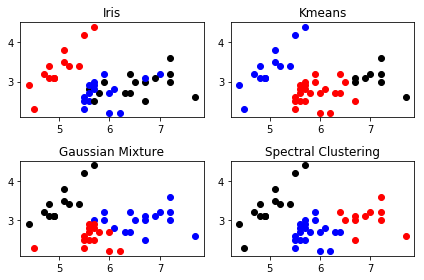

In [7]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

cant = 150
cluster = 3

X = data['data']
X = X[:cant,:2]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']
print(target_names[:cluster])
print('Iris')
print(t_test)


################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)

################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t_test, result_kmeans, result_gnm, result_spectral]
ploting(titles, result, X_test)

['setosa' 'versicolor' 'virginica']
Iris
[1 2 0 0 1 2 2 1 2 1 1 1 0 2 0 0 0 2 0 1 1 1 2 1 0 2 2 2 1 1 2 0 1 1 1 0 2
 1 2 1 1 1 0 1 2]
Kmeans
[2 0 1 1 0 0 0 2 0 2 2 2 1 0 1 1 1 0 1 2 2 2 2 2 1 2 0 2 2 2 0 1 2 2 2 1 0
 2 0 2 2 2 1 2 0]
Gaussian Mixture
[2 0 1 1 2 0 0 2 0 2 2 2 1 0 1 1 1 0 1 2 2 2 2 2 1 2 0 2 2 2 0 1 2 2 2 1 0
 2 0 2 2 2 1 2 0]
Spectral Clustering
[1 1 2 2 1 1 1 0 1 0 0 0 2 1 2 2 2 1 2 0 0 0 1 0 2 1 1 1 0 0 1 2 0 0 0 2 1
 0 1 0 0 0 2 0 1]
Accuracy Kmeans 73.27790973871734%
Accuracy Gaussian Mixture 79.45205479452055%
Accuracy Spectral Clustering 85.49928594968692%


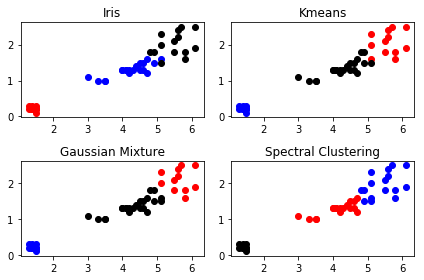

In [8]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 2 Atributos en cm - Largo del Petalo, Ancho del Petalo 

cant = 150
cluster = 3

X = data['data']
X = X[:cant,2:]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']
print(target_names[:cluster])
print('Iris')
print(t_test)


################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)


################################### Ploteando
titles = ['Iris', 'Kmeans', 'Gaussian Mixture', 'Spectral Clustering']
result = [t_test, result_kmeans, result_gnm, result_spectral]
ploting(titles, result, X_test)

## 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
## 2 Atributos en cm - Largo del Sepalo, Ancho del Sepalo

En este caso en particular al reducir las tres variables del dataset a solo dos parametros que las identifiquen al momento de hacer la relación en los datos que quiero hacer clustering no se encuentra ningun resultado por ninguno de los tres algoritmos.

In [9]:
# 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
# 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo 

cant = 150
cluster = 3

X = data['data']
X = X[:cant,:]
t = data['target']
t = t[:cant]
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)
target_names = data['target_names']

print(target_names[:cluster])
print('Iris')
print(t_test)


################################### Corriendo los algoritmos
clustering = Clustering(cluster)
clustering.fit(X_train)
result_kmeans, result_gnm, result_spectral = clustering.predict(X_test)
clustering.printAccuracy(t_test)

['setosa' 'versicolor' 'virginica']
Iris
[1 0 0 1 1 2 0 0 2 1 1 1 0 2 2 2 2 1 2 1 1 1 1 2 1 2 2 0 0 2 2 2 0 0 2 2 2
 2 1 2 0 2 1 0 0]
Kmeans
[1 0 0 1 1 2 0 0 2 1 1 1 0 2 2 1 2 1 2 1 1 1 1 2 2 2 2 0 0 2 1 2 0 0 2 1 2
 1 1 2 0 1 1 0 0]
Gaussian Mixture
[2 1 1 2 2 0 1 1 0 2 2 2 1 0 0 0 0 2 0 2 2 2 2 0 2 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 0 1 0 2 1 1]
Spectral Clustering
[0 1 1 0 0 2 1 1 2 0 0 0 1 2 2 0 2 0 2 0 0 0 0 2 0 2 2 1 1 2 0 2 1 1 2 0 2
 0 0 0 1 0 0 1 1]
Accuracy Kmeans 62.95526359554299%
Accuracy Gaussian Mixture 92.73854165711613%
Accuracy Spectral Clustering 63.23886713915044%


## 150 instancias - 3 Clases de Iris - 50 Iris Setosa, 50 Iris Versicolor, 50 Iris Virginica
## 4 Atributos en cm - Largo del Sepalo, Ancho del Sepalo, Largo del Petalo, Ancho del Petalo

Para este data set los algoritmos de clustering que previamente se han analizado no encuentran un adecuado agrupamiento debido a la representación que se tiene de los datos.

# Webgrafía

https://www.quora.com/What-are-the-advantages-of-spectral-clustering-over-k-means-clustering

https://www.quora.com/How-does-spectral-clustering-work

https://www.quora.com/What-are-the-advantages-of-spectral-clustering-over-k-means-clustering

https://www.quora.com/What-is-the-difference-between-K-means-and-the-mixture-model-of-Gaussian

https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm

https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset